In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect("../data/Checking_Logs.sqlite")

In [4]:
df = pd.read_sql("SELECT timestamp as datetime FROM checker WHERE uid LIKE 'user_%'", con, parse_dates=['datetime'])
df

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [5]:
df['daytype'] = df['datetime'].dt.day_of_week.apply(lambda x: 'weekend' if x > 4 else 'working_day')
df

,datetime,daytype
0,2020-04-17 05:19:02.744528,working_day
1,2020-04-17 05:22:35.249331,working_day
2,2020-04-17 05:22:45.549397,working_day
3,2020-04-17 05:34:14.691200,working_day
4,2020-04-17 05:34:24.422370,working_day
...,...,...
3202,2020-05-21 20:19:06.872761,working_day
3203,2020-05-21 20:22:41.785725,working_day
3204,2020-05-21 20:22:41.877806,working_day
3205,2020-05-21 20:37:00.129678,working_day


In [6]:
df['hour'] = df['datetime'].dt.hour
df

,datetime,daytype,hour
0,2020-04-17 05:19:02.744528,working_day,5
1,2020-04-17 05:22:35.249331,working_day,5
2,2020-04-17 05:22:45.549397,working_day,5
3,2020-04-17 05:34:14.691200,working_day,5
4,2020-04-17 05:34:24.422370,working_day,5
...,...,...,...
3202,2020-05-21 20:19:06.872761,working_day,20
3203,2020-05-21 20:22:41.785725,working_day,20
3204,2020-05-21 20:22:41.877806,working_day,20
3205,2020-05-21 20:37:00.129678,working_day,20


In [9]:
data = [df[df['daytype'] == 'working_day']['hour'].to_list(),
        df[df['daytype'] == 'weekend']['hour'].to_list()]

[]

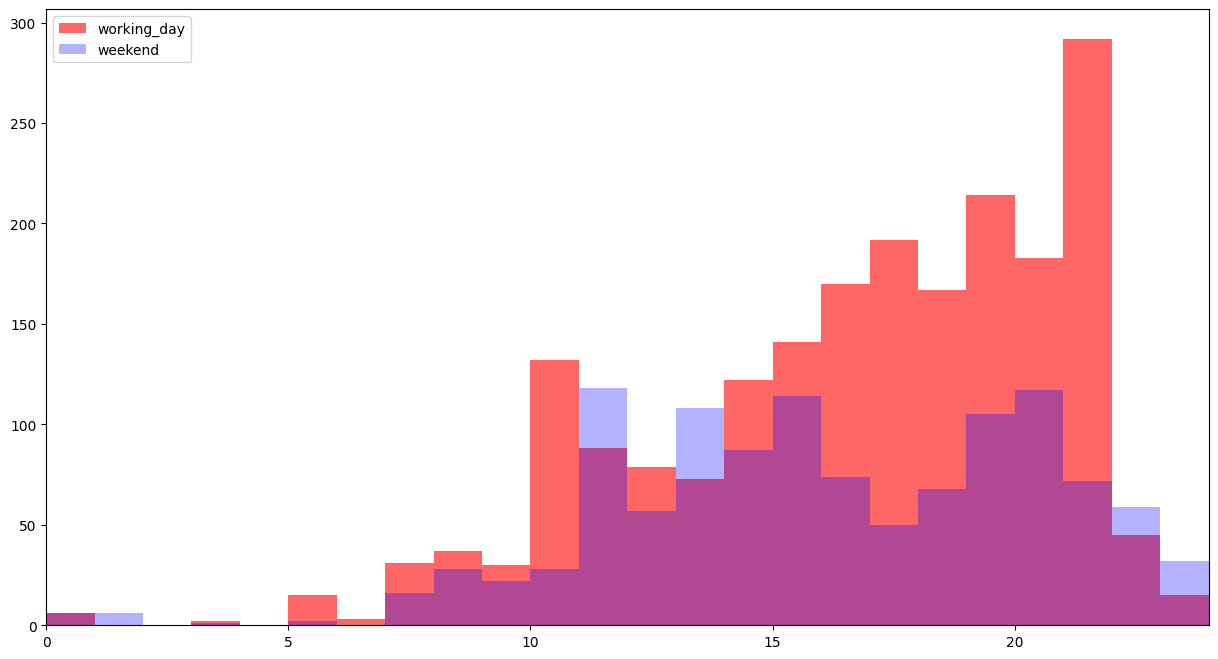

In [23]:
plt.figure(figsize=(15, 8))
plt.hist(x=data[0],
         bins=range(0, 25),
         range=[0, 24],
         color='Red',
         alpha= 0.6)

plt.hist(x=data[1],
         bins=range(0, 25),
         range=[0, 24],
         color='Blue',
         alpha=0.3)

plt.legend(['working_day', 'weekend'])
plt.xlim(0, 24)

plt.plot()

In [24]:
con.close()

## Are there hours when the total number of commits was higher on weekends than on working days?
- Yes, on 11, 13, 22 and 23 hours